# Import Libraries

In [31]:
import os

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE


In [3]:
# Loading all the cleaned data in different csv files
# Specify the folder containing the CSV files
folder_path = 'Dataset/Cleaned'

# Initialize an empty list to store DataFrames
dataframes = []

# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)  # Load CSV into a DataFrame
        dataframes.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the combined DataFrame
print(combined_df)

       Unnamed: 0                                             name  \
0               0                     Shree Vishwokarma Agam Chhen   
1               1                              Aadipadma Mahavihar   
2               2                    Lokeshwor temple of Bhaktapur   
3               3                  Indra Varna Mahavihar (Inabaha)   
4               4        Mangal Dharmadweep Mahavihar (Jhaur Bahi)   
...           ...                                              ...   
36523        1142                        Old Walled City of Shibam   
36524        1143                               Old City of Sana'a   
36525        1144                           Historic Town of Zabid   
36526        1145                              Socotra Archipelago   
36527        1146  Landmarks of the Ancient Kingdom of Saba, Marib   

                                             description  longitude  \
0      Shree Vishwakarma Agam Chhen, located at Tuchi...  85.430630   
1      Aadipadma 

In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36528 entries, 0 to 36527
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    36528 non-null  int64  
 1   name          36528 non-null  object 
 2   description   1170 non-null   object 
 3   longitude     36528 non-null  float64
 4   latitude      36528 non-null  float64
 5   category      36528 non-null  object 
 6   country       36528 non-null  object 
 7   Unnamed: 0.1  248 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.2+ MB


In [5]:
combined_df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'],inplace=True)

In [6]:
# df= combined_df.groupby('country')['name'].nunique()
combined_df['country'].nunique()

37

In [7]:
asian_countries = [
    "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan",
    "Brunei", "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia",
    "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait",
    "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia",
    "Myanmar (Burma)", "Nepal", "North Korea", "Oman", "Pakistan", "Palestine",
    "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea",
    "Sri Lanka", "Syria", "Tajikistan", "Thailand", "Timor-Leste", "Turkey",
    "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
]

In [8]:
df_set = set(combined_df['country'])
for country in asian_countries:
    if country not in df_set:
        print(country)

Bhutan
Iran
Kuwait
Laos
Maldives
Myanmar (Burma)
North Korea
South Korea
Syria
Turkey
Vietnam


In [9]:
top10_countries = combined_df['country'].value_counts().reset_index().head(10)
top10_countries

,country,count
0,Indonesia,22898
1,India,8110
2,Malaysia,3591
3,Sri Lanka,763
4,Singapore,501
5,Timor-Leste,139
6,Nepal,112
7,China,111
8,Japan,48
9,Brunei,42


In [10]:
df = combined_df[combined_df['country'] == 'Nepal'].reset_index()
df.head()

,index,name,description,longitude,latitude,category,country
0,0,Shree Vishwokarma Agam Chhen,"Shree Vishwakarma Agam Chhen, located at Tuchi...",85.430630,27.673888,Heritage Site,Nepal
1,1,Aadipadma Mahavihar,Aadipadma Mahavihar is one of Bhaktapur’s olde...,85.435271,27.673311,Heritage Site,Nepal
2,2,Lokeshwor temple of Bhaktapur,"Bhaktapur’s Lokeshwor temple, also known as Ka...",85.425318,27.672076,Heritage Site,Nepal
3,3,Indra Varna Mahavihar (Inabaha),Indra Varna Mahavihar locally called Inabaha a...,85.434118,27.672373,Heritage Site,Nepal
4,4,Mangal Dharmadweep Mahavihar (Jhaur Bahi),"Mangal Dharmadweep Mahavihar, which is located...",85.433093,27.672364,Heritage Site,Nepal


In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36528 entries, 0 to 36527
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         36528 non-null  object 
 1   description  1170 non-null   object 
 2   longitude    36528 non-null  float64
 3   latitude     36528 non-null  float64
 4   category     36528 non-null  object 
 5   country      36528 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.7+ MB


In [ ]:
top10_countries = combined_df['country'].value_counts().reset_index().head(10)
top10_countries

,country,count
0,Indonesia,20291
1,India,7670
2,Malaysia,3134
3,Sri Lanka,714
4,Singapore,439
5,Timor-Leste,126
6,Nepal,107
7,China,56
8,Brunei,42
9,Japan,24


In [ ]:
combined_df.drop_duplicates(subset ='name',inplace= True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32715 entries, 0 to 36527
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         32715 non-null  object 
 1   description  869 non-null    object 
 2   longitude    32715 non-null  float64
 3   latitude     32715 non-null  float64
 4   category     32715 non-null  object 
 5   country      32715 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.7+ MB


In [43]:
combined_df.dropna(subset='description', inplace= True)
combined_df= combined_df.reset_index(drop=True)


In [ ]:
# top10_countries = deleted['country'].value_counts().reset_index().head(10)
# top10_countries

,country,count
0,India,390
1,Nepal,107
2,Indonesia,68
3,Malaysia,56
4,China,56
5,Singapore,26
6,Japan,24
7,Sri Lanka,16
8,Timor-Leste,14
9,Israel,9


In [44]:
# Vectorize 'Description' column using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
description_vectors = tfidf.fit_transform(combined_df['description']).toarray()


In [45]:

# One-hot encode 'Category'
encoder = OneHotEncoder()
category_encoded = encoder.fit_transform(combined_df[['category']]).toarray()

In [46]:
# Combine Latitude, Longitude with encoded features and TF-IDF vectors
geo_features = combined_df[['latitude', 'longitude']].values
geo_weight = 0.5
desc_weight = 1.5
category_weight = 1.0

weighted_features = np.hstack((
    geo_features * geo_weight,
    category_encoded * category_weight,
    description_vectors * desc_weight
))


In [47]:
# Compute similarity between places
similarity_matrix = cosine_similarity(weighted_features)

In [52]:
# Get recommendations for a specific place (e.g., index 0)
place_index = 123
similar_places = np.argsort(-similarity_matrix[place_index])[1:6]  # Top 5 excluding itself
similar_places


array([100, 183, 188, 207, 796])

In [53]:
print(combined_df.iloc[similar_places])


                                                  name  \
100                                             Dakmar   
183                                         Sadda Pind   
188                                      Sentinel peak   
207                                      Ubarak Kangri   
796  Great Burkhan Khaldun Mountain and its surroun...   

                                           description   longitude   latitude  \
100               path going to Dakmar meditation cave   77.057342  34.332248   
183  Recreated Punjabi village with activities and ...   74.812824  31.643733   
188                 first ascent: john jackson in 1945   75.133223  34.199445   
207           https://www.instagram.com/p/CavzzTrl8pz/   76.821254  33.416990   
796  <p>The site is situated in the north-east of t...  109.009328  48.761978   

               category   country  
100  Tourist Attraction     India  
183  Tourist Attraction     India  
188    Natural Landmark     India  
207    Natural Landm

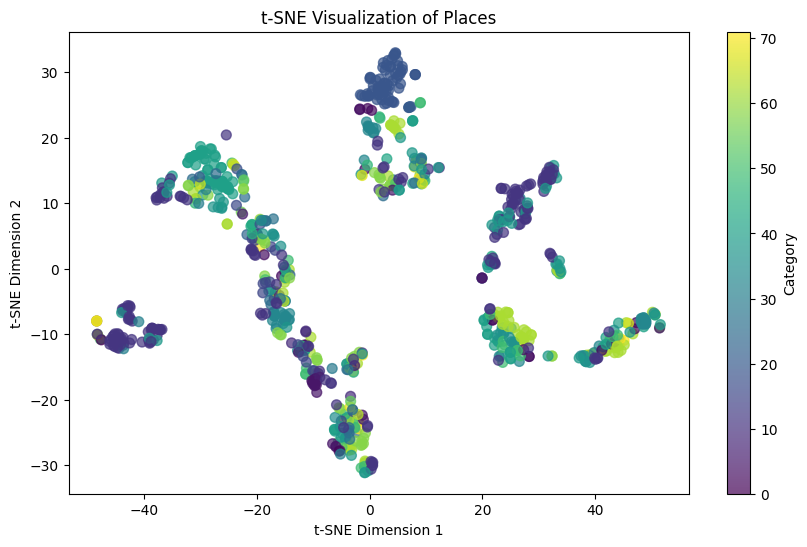

In [50]:

# Assuming 'features' contains your combined feature vectors
# Step 1: Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_features = tsne.fit_transform(weighted_features)

# Step 2: Plot the reduced features
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1],
                      c=combined_df['category'].astype('category').cat.codes, cmap='viridis', s=50, alpha=0.7)

# Add a legend (if categories are used)
plt.colorbar(scatter, label='Category')
plt.title('t-SNE Visualization of Places')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [51]:
combined_df.to_csv('Combined.csv')